In [1]:
import numpy as np
import pandas as pd

In [2]:
df_survey = pd.read_csv("https://cocl.us/datascience_survey_data", index_col = 0)
print("Data read into a pandas dataframe!")

Data read into a pandas dataframe!


In [3]:
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [4]:
df_survey.sort_values(by = "Very interested", ascending = False, axis = 0, inplace = True)

df_survey["Very interested"] = df_survey["Very interested"] / 2233.0 * 100
df_survey["Somewhat interested"] = df_survey["Somewhat interested"] / 2233.0 * 100
df_survey["Not interested"] = df_survey["Not interested"] / 2233.0 * 100
df_survey = df_survey.round(2)
df_survey


,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("ggplot")

!pip install --upgrade matplotlib

print(mpl.__version__)


     |████████████████████████████████| 12.4MB 631kB/s eta 0:00:01    |████████▉                       | 3.4MB 2.5MB/s eta 0:00:0404
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
3.1.1


In [6]:
df_survey = df_survey.transpose()
df_survey

,Data Analysis / Statistics,Machine Learning,Data Visualization,Big Data (Spark / Hadoop),Deep Learning,Data Journalism
Very interested,75.59,72.95,60.01,59.65,56.56,19.21
Somewhat interested,19.88,21.36,32.87,32.65,34.48,48.41
Not interested,2.69,3.31,4.57,5.69,6.09,27.32


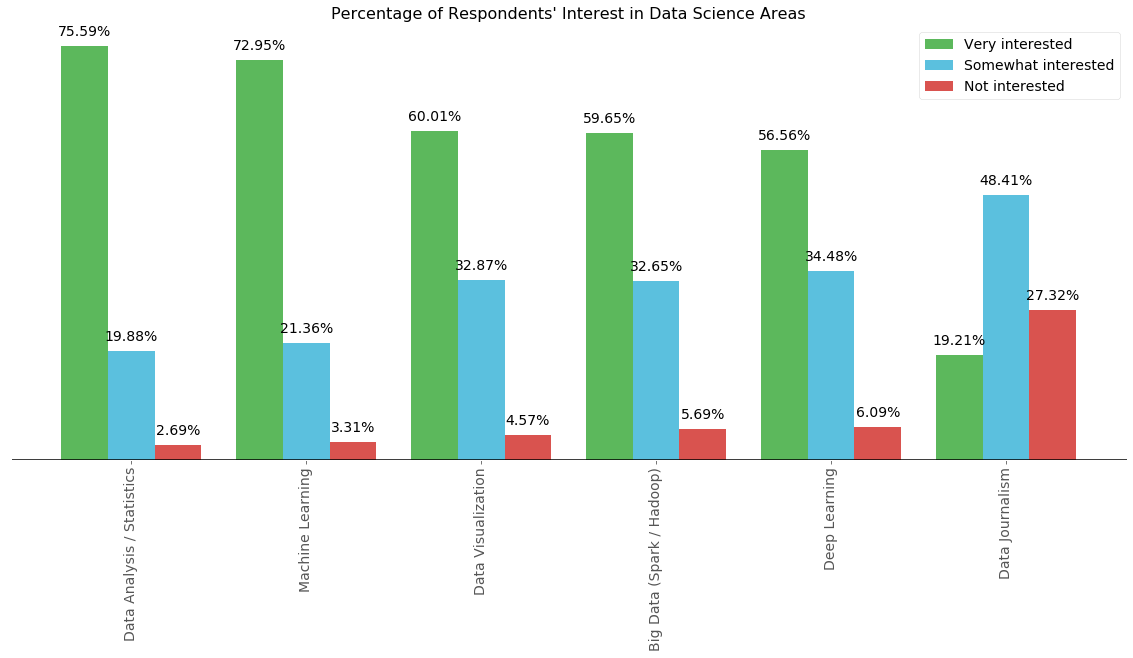

In [7]:
df_vi = df_survey.loc["Very interested"]
df_si = df_survey.loc["Somewhat interested"]
df_ni = df_survey.loc["Not interested"]

labels = df_survey.columns
fig, ax = plt.subplots(figsize = (20, 8))
x = np.arange(len(labels))
width = 0.8/3
vi = ax.bar(x - width, df_vi, width, color = "#5cb85c", label = "Very interested")
si = ax.bar(x, df_si, width, color = "#5bc0de", label = "Somewhat interested")
ni = ax.bar(x + width, df_ni, width, color = "#d9534f", label = "Not interested")

ax.set_title("Percentage of Respondents' Interest in Data Science Areas", fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 90, fontsize = 14)
ax.legend(loc = "upper right", fontsize = 14, facecolor = "white")

def autolabel(interest):
    for i in interest:
        height = i.get_height()
        ax.annotate('{}%'.format(height), xy = (i.get_x() + i.get_width()/2, height), xytext=(0, 10), textcoords="offset points", ha='center', fontsize = 14)
        
autolabel(vi)
autolabel(si)
autolabel(ni)

ax.set_facecolor("white")
ax.axhline(y = 0, color = "black")
ax.get_yaxis().set_visible(False)

plt.show()
